## Implementing Gradient Descent & MSE with Univariate Linear Regression from scratch

In [233]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [234]:
df = pd.read_csv('cracow_apartments.csv')
df.head()

,distance_to_city_center,rooms,size,price
0,2.4,1.0,19.35,191.565
1,2.4,2.0,13.08,221.568
2,5.0,1.0,24.66,185.936
3,1.9,1.0,24.82,275.502
4,1.9,1.0,25.39,241.205


In [209]:
# 3 features, 1 target value(price) that needs to be predicted by the model.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76 entries, 0 to 75
Data columns (total 4 columns):
distance_to_city_center    76 non-null float64
rooms                      76 non-null float64
size                       76 non-null float64
price                      76 non-null float64
dtypes: float64(4)
memory usage: 2.5 KB


In [210]:
# The avg. price of a house is 356.8k
# The avg. no. rooms is around 3 rooms.
df.describe()

,distance_to_city_center,rooms,size,price
count,76.000000,76.000000,76.000000,76.000000
mean,5.106579,2.644737,48.138684,356.867974
std,2.295639,1.261787,22.009502,157.198524
min,1.400000,1.000000,13.080000,151.757000
25%,3.000000,2.000000,30.600000,235.533750
50%,5.050000,2.500000,41.280000,298.442500
75%,6.800000,3.250000,58.162500,433.078500
max,11.300000,5.000000,106.960000,808.144000


**We want to predict the price of appartments in cracow**

In [212]:
def init(n): # n is the number of features in our dataset.
    """returns a dictionary containing model weights and bias."""
    return {"w": np.zeros(n), "b":0.0}

# since our dataset has 3 features for the house.
init(3)

{'w': array([0., 0., 0.]), 'b': 0.0}

In [213]:
# Ŷ = w1*x1 + w2*x2 + w3*x3 + b  where x1, x2, x3  are the features of the
# house and Ŷ is the value our model predicts.

# x is a vector of features representing a single data sample.
# parameters is a dictionary which stores parameters of the model
# along with their current state.
def predict(x, parameters):
    """returns a prediction for a single data sample."""
    
    # prediction initial value.
    prediction = 0
    for weight, feature in zip(parameters["w"], x):
       # Ŷ = w1*x1 + w2*x2 + w3*x3
        prediction += weight * feature
    
    # Adding bias
    prediction += parameters["b"]
    
    return prediction

In [214]:
# using only one feature for now
features =["size"]
target = ["price"]

# X has the feature in a numpy array, y has the target in a numpy array.
# both of size the no. of the data samples.
X, y = df["size"].values, df["price"].values    

# Initialize model parameters
n = len(features) # 1 in this case.

# {'w': array([0.]), 'b': 0.0}
model_parameters = init(n)

# Make prediction for every data sample.
# we take the value of the feature(x) as a list to support iterations.
y_predictions = [predict([x], model_parameters) for x in X]

In [215]:
# at first predictions will be 0 since weights and bias are 0
# but we will improve that by using gradient descent algorithm.
# to learn and improve our parameters.
y_predictions

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0]

In [216]:
# true prices for the appartments
y

array([191.565, 221.568, 185.936, 275.502, 241.205, 193.052, 231.861,
       151.757, 172.003, 175.952, 234.08 , 185.967, 185.025, 261.884,
       235.8  , 357.511, 287.1  , 297.605, 292.882, 234.432, 232.113,
       209.43 , 272.844, 223.08 , 290.739, 224.064, 241.215, 299.28 ,
       255.42 , 287.   , 234.735, 349.233, 272.227, 325.777, 360.418,
       459.993, 321.98 , 393.   , 375.852, 427.023, 339.129, 350.9  ,
       409.836, 334.89 , 389.932, 417.   , 413.25 , 451.245, 504.589,
       418.46 , 455.65 , 614.809, 485.261, 495.489, 555.   , 714.183,
       521.571, 529.753, 680.6  , 680.   , 464.18 , 483.505, 692.712,
       782.1  , 700.   , 808.144, 292.885, 229.09 , 285.048, 287.6  ,
       284.625, 325.   , 373.088, 177.702, 264.11 , 242.52 ])

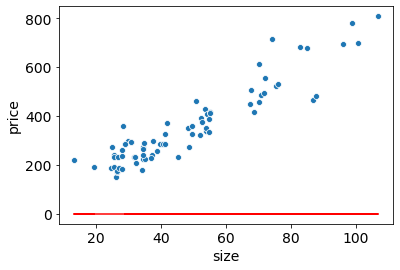

In [217]:
# the red lines referes to our predictions.
# notice the distance between the dots in the red line and the blue dots-
# is the error in our prediction that we would like to minimize.

sns.scatterplot(x="size", y="price", data=df)
plt.plot(X, y_predictions, color='red')

## Univariate Linear regression 

In [349]:
# Ŷ = w1*x1 + w2*x2 + w3*x3 + b  where x1, x2, x3  are the features of the
# house and Ŷ is the value our model predicts.
# This is the hypothesis

# x is a feature that we will use to do our uni_variate_linear regression.
# parameters is a dictionary which stores parameters of the model
# along with their current state.
def uni_variate_predict(x, parameters):

    # prediction initial value.
    prediction = 0
    
    # Ŷ = w1*x1
    prediction += parameters["w"] * x
    
    # Adding bias
    prediction += parameters["b"]
    
    return prediction # Ŷ = w1*x1 + b


In [350]:
# Returns avg. squared difference between the predictions and targets.
# The error is equivalent to the area of the square created of the- geometrical distance between the tuple measured points.
# most popular when using gradient descent for optimization.
       
def mean_squared_error(predictions, targets):
  
    # getting number of samples in a dataset.
    num_samples = len(predictions)
    
    # adding the square differences between predicted and expected values.
    sum_errors = 0
    
    # iterate through tuples of neighboring elements in both lists.
    for prediction, target in zip(predictions, targets):
        sum_errors += (prediction - target) **2 # squared value error.
    
    mse = (1 / (2 * num_samples)) * sum_errors 
    return mse

In [351]:
# uses gradient descent algorithm to find the local minimum of the cost-
# function that decreases the error between the prediction target and
# the actual price of a house in our example.


def uni_variate_linear_regression_fit(X, y, model_parameters, learning_rate=0.0005, iterations=20000):
    
    # Make prediction for every data sample house price. which is initially 0.since weights and bias are initially 0.
     y_predictions = [uni_variate_predict(x, model_parameters) for x in X]
    
    # initial distance error between our predicted price for the house and the actual price of a house. 
    initial_error = mean_squared_error(y_predictions, y)
    
    print("Initial State:")
    print(" - error: {}".format(initial_error))
    print(" - parameters: {}".format(model_parameters))
    
    #Looping till min error in our predictions
    
    for i in range(iterations):
        
        # keep decreasing or increasing the value of the feature weight and the bias.
        # in order to reach the local minima of cost function.
        
        accumulated_gradient_weight = 0
        accumulated_gradient_bias = 0
        
        # in this case x is the size of a single house, y_target is it's price.
        # Now get the derivative of the cost function one time with respect to w0 and once with respect to bias 
            
        for x, y_target in zip(X, y):
            accumulated_gradient_weight += (uni_variate_predict(x, model_parameters) - y_target) * x
            accumulated_gradient_bias += (uni_variate_predict(x, model_parameters) - y_target)
        
        # Calculates the rate of change of the cost function with respect to the change in the weight of a feature. ( mean of gradient)
        weight_gradient = (1.0 / len(X)) * accumulated_gradient_weight
    
        # Calculates the rate of change of the cost function with respect to the change of the bias. ( mean of gradient)
        bias_gradient = (1.0 / len(X)) * accumulated_gradient_bias
        
        
        # After we got the derivatives (directions) now Use the update Rule
        # Update parameters by small part of averaged gradient
        # updating the values of the weights and bias.
        model_parameters["w"] = model_parameters["w"] - learning_rate * weight_gradient
        model_parameters["b"] = model_parameters["b"] - learning_rate * bias_gradient
        
        if i % 4000 == 0: # for each 4k iterations print these.
            print("\nIteration {}:".format(i))
            print(" - error: {}".format(mean_squared_error([uni_variate_predict(x, model_parameters) for x in X], y)))
            print(" - parameters: {}".format(model_parameters))

    print("\nFinal state:")
    print(" - error: {}".format(mean_squared_error([uni_variate_predict(x, model_parameters) for x in X], y)))
    print(" - parameters: {}".format(model_parameters))
    
    return model_parameters
    


In [352]:
# Sizes of the appartements
X

array([ 19.35,  13.08,  24.66,  24.82,  25.39,  25.54,  25.62,  26.04,
        26.26,  26.26,  26.6 ,  26.87,  27.85,  27.86,  27.93,  28.32,
        29.  ,  29.91,  30.83,  31.68,  32.02,  32.22,  34.32,  34.32,
        34.78,  35.01,  37.11,  37.41,  38.7 ,  29.  ,  45.15,  48.17,
        48.52,  49.42,  49.44,  50.91,  51.9 ,  52.4 ,  52.7 ,  53.61,
        53.83,  53.86,  54.18,  54.9 ,  54.92,  54.97,  55.1 ,  67.35,
        67.73,  68.6 ,  70.1 ,  70.16,  70.81,  71.81,  72.02,  74.36,
        75.59,  75.92,  83.  ,  85.09,  86.86,  87.91,  96.21,  99.  ,
       100.88, 106.96,  30.83,  36.95,  39.59,  40.69,  41.25,  41.31,
        41.94,  34.18,  34.3 ,  34.4 ])

In [353]:
# Prices of the appartments
y

array([191.565, 221.568, 185.936, 275.502, 241.205, 193.052, 231.861,
       151.757, 172.003, 175.952, 234.08 , 185.967, 185.025, 261.884,
       235.8  , 357.511, 287.1  , 297.605, 292.882, 234.432, 232.113,
       209.43 , 272.844, 223.08 , 290.739, 224.064, 241.215, 299.28 ,
       255.42 , 287.   , 234.735, 349.233, 272.227, 325.777, 360.418,
       459.993, 321.98 , 393.   , 375.852, 427.023, 339.129, 350.9  ,
       409.836, 334.89 , 389.932, 417.   , 413.25 , 451.245, 504.589,
       418.46 , 455.65 , 614.809, 485.261, 495.489, 555.   , 714.183,
       521.571, 529.753, 680.6  , 680.   , 464.18 , 483.505, 692.712,
       782.1  , 700.   , 808.144, 292.885, 229.09 , 285.048, 287.6  ,
       284.625, 325.   , 373.088, 177.702, 264.11 , 242.52 ])

In [354]:
# initializing the weights and bias for the size feature. to be both 0.0.
model_parameters = init(1) # in this case one 1 feture 

In [355]:
#the error is minimizing and the weights are bias are changing.
best_params = uni_variate_linear_regression_fit(X, y, model_parameters)

Initial State:
 - error: 75870.48844819736
 - parameters: {'w': array([0.]), 'b': 0.0}

Iteration 0:
 - error: [13536.3070032]
 - parameters: {'w': array([10.17501967]), 'b': array([0.17843399])}

Iteration 4000:
 - error: [1737.28457739]
 - parameters: {'w': array([7.09101188]), 'b': array([10.96966037])}

Iteration 8000:
 - error: [1707.33242182]
 - parameters: {'w': array([6.9583785]), 'b': array([18.67110985])}

Iteration 12000:
 - error: [1692.21685452]
 - parameters: {'w': array([6.86415678]), 'b': array([24.14215949])}

Iteration 16000:
 - error: [1684.5886765]
 - parameters: {'w': array([6.79722241]), 'b': array([28.02875048])}

Final state:
 - error: [1680.73973307]
 - parameters: {'w': array([6.74968272]), 'b': array([30.78917543])}


In [356]:
# The function returns the best values for the weight of the size feature and the bias.
best_params

{'w': array([6.74968272]), 'b': array([30.78917543])}

In [357]:
#Returns the predicted values of our target based on our feature we are using

def univariate_linear_regression_predict(X,best_params):
    
    y_predictions = []
    
    for x in X: # the size for each house in our dataset.
    
        ypred = best_params["w"] * x + best_params["b"]
        y_predictions.append(ypred)
        
    return y_predictions

# Now make predictions using the best parameters
# Returns predicted price values for all samples in our dataset.
y_predictions = univariate_linear_regression_predict(X, best_params)

In [358]:
# Real price values in our dataset.
y

array([191.565, 221.568, 185.936, 275.502, 241.205, 193.052, 231.861,
       151.757, 172.003, 175.952, 234.08 , 185.967, 185.025, 261.884,
       235.8  , 357.511, 287.1  , 297.605, 292.882, 234.432, 232.113,
       209.43 , 272.844, 223.08 , 290.739, 224.064, 241.215, 299.28 ,
       255.42 , 287.   , 234.735, 349.233, 272.227, 325.777, 360.418,
       459.993, 321.98 , 393.   , 375.852, 427.023, 339.129, 350.9  ,
       409.836, 334.89 , 389.932, 417.   , 413.25 , 451.245, 504.589,
       418.46 , 455.65 , 614.809, 485.261, 495.489, 555.   , 714.183,
       521.571, 529.753, 680.6  , 680.   , 464.18 , 483.505, 692.712,
       782.1  , 700.   , 808.144, 292.885, 229.09 , 285.048, 287.6  ,
       284.625, 325.   , 373.088, 177.702, 264.11 , 242.52 ])

In [359]:
y_predictions

[array([161.39553613]),
 array([119.07502545]),
 array([197.23635139]),
 array([198.31630062]),
 array([202.16361978]),
 array([203.17607219]),
 array([203.7160468]),
 array([206.55091355]),
 array([208.03584375]),
 array([208.03584375]),
 array([210.33073587]),
 array([212.15315021]),
 array([218.76783928]),
 array([218.8353361]),
 array([219.30781389]),
 array([221.94019016]),
 array([226.52997441]),
 array([232.67218569]),
 array([238.88189379]),
 array([244.61912411]),
 array([246.91401623]),
 array([248.26395278]),
 array([262.4382865]),
 array([262.4382865]),
 array([265.54314055]),
 array([267.09556758]),
 array([281.2699013]),
 array([283.29480611]),
 array([292.00189683]),
 array([226.52997441]),
 array([335.53735039]),
 array([355.92139222]),
 array([358.28378117]),
 array([364.35849562]),
 array([364.49348928]),
 array([374.41552288]),
 array([381.09770878]),
 array([384.47255014]),
 array([386.49745496]),
 array([392.63966623]),
 array([394.12459643]),
 array([394.32708692]

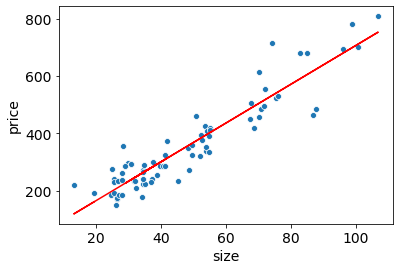

In [362]:
# Plot a predicted line that fits the actual data.
sns.scatterplot(x="size", y="price", data=df)
plt.plot(X, y_predictions, color='red')